<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

# 실습 내용

- AirQuality 데이터에 대해 모델링합니다.
- KNN 알고리즘을 사용해 모델링합니다.

# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

In [2]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/airquality_simple.csv'
data = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 충분히 이해할 수 있도록 다양한 탐색 과정을 수행합니다.

In [3]:
# 상위 몇 개 행 확인
data.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41,190.0,7.4,67,5,1
1,36,118.0,8.0,72,5,2
2,12,149.0,12.6,74,5,3
3,18,313.0,11.5,62,5,4
4,19,NaN,14.3,56,5,5


In [4]:
# 기술통계 확인
data.describe()

,Ozone,Solar.R,Wind,Temp,Month,Day
count,153.000000,146.000000,153.000000,153.000000,153.000000,153.000000
mean,42.052288,185.931507,9.957516,77.882353,6.993464,15.803922
std,30.156127,90.058422,3.523001,9.465270,1.416522,8.864520
min,1.000000,7.000000,1.700000,56.000000,5.000000,1.000000
25%,20.000000,115.750000,7.400000,72.000000,6.000000,8.000000
50%,34.000000,205.000000,9.700000,79.000000,7.000000,16.000000
75%,59.000000,258.750000,11.500000,85.000000,8.000000,23.000000
max,168.000000,334.000000,20.700000,97.000000,9.000000,31.000000


In [5]:
# NaN 값 확인
data.isnull().sum()

Ozone      0
Solar.R    7
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

In [6]:
# 상관관계 확인
data.corr()

,Ozone,Solar.R,Wind,Temp,Month,Day
Ozone,1.000000,0.280068,-0.605478,0.683372,0.174197,0.004419
Solar.R,0.280068,1.000000,-0.056792,0.275840,-0.075301,-0.150275
Wind,-0.605478,-0.056792,1.000000,-0.457988,-0.178293,0.027181
Temp,0.683372,0.275840,-0.457988,1.000000,0.420947,-0.130593
Month,0.174197,-0.075301,-0.178293,0.420947,1.000000,-0.007962
Day,0.004419,-0.150275,0.027181,-0.130593,-0.007962,1.000000


# 3.데이터 준비

- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) 결측치 처리**

- 결측치가 있으면 제거하거나 적절한 값으로 채웁니다.
- 시계열 데이터이므로 선형보간법으로 채웁니다.

In [7]:
# 결측치 확인
data.isnull().sum()

Ozone      0
Solar.R    7
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

In [8]:
# 결측치 채우기
data.interpolate(method='linear', inplace=True)

# 확인
data.isnull().sum()

Ozone      0
Solar.R    0
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

**2) 변수 제거**

- 분석에 의미가 없다고 판단되는 변수는 제거합니다.
- Month, Day 열을 제거합니다.

In [9]:
#  변수 제거
drop_cols = ['Month', 'Day']
data.drop(drop_cols, axis=1, inplace=True)

# 확인
data.head()

,Ozone,Solar.R,Wind,Temp
0,41,190.000000,7.4,67
1,36,118.000000,8.0,72
2,12,149.000000,12.6,74
3,18,313.000000,11.5,62
4,19,308.333333,14.3,56


**3) x, y 분리**

- target 변수를 명확히 지정합니다.
- target을 제외한 변수를 x 데이터프레임으로 선언합니다.
- y 데이터프레임은 target 변수만을 가집니다.

In [10]:
# target 확인
target = 'Ozone'

# 데이터 분리
x = data.drop(target, axis=1)
y = data.loc[:, target]

**4) 학습용, 평가용 데이터 분리**

- 학습용, 평가용 데이터를 적절한 비율로 분리합니다.
- 반복 실행 시 동일한 결과를 얻기 위해 random_state 옵션을 지정합니다.

In [11]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 데이터 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)  

**5) 정규화**

- KNN 알고리즘을 사용하기 위해 정규화를 진행합니다.

In [12]:
# 모듈 불러오기
from sklearn.preprocessing import MinMaxScaler

# 정규화
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# 4.모델링

- 본격적으로 모델을 선언하고 학습하고 평가하는 과정을 진행합니다.

In [13]:
# 1단계: 불러오기
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [14]:
# 2단계: 선언하기
model = KNeighborsRegressor()

In [15]:
# 3단계: 학습하기
model.fit(x_train, y_train)

KNeighborsRegressor()

In [16]:
# 4단계 예측하기
y_pred = model.predict(x_test)

In [17]:
# 5단계: 평가하기
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2-Score:', r2_score(y_test, y_pred))

MAE: 12.443478260869565
R2-Score: 0.6168024614834005


# 5.기타
- 모델이 복잡하다는 것은 학습 데이터에 너무 치중한 나머지 실제 평가시 성능이 좋지 않은 것 (과적합)
    - 기타 필요한 내용이 있으면 진행합니다.

- Linear Regression : 독립 변수가 너무 많을 수록
- KNN: x값, 즉 n_neighbors 값이 작을 수록 
- Decision Tree : max_depth가 클수록 복잡한 모델이 됨
> 적당한 복잡성을 갖는 모델을 만들어야 함. 너무 단순해도/복잡해도 안된다

**1) 학습 성능**

- n_neighbors 값을 학습 데이터 건수로 하면 가장 단순한 모델, 즉 평균이 됩니다.
- n_neighbors 값을 1로 하면 가장 복잡한 모델이 되며 정답, 즉 y_train 값을 외운 결과가 됩니다.
- n_neighbors 값에 따라 학습 데이터를 얼마나 깊이 있게 학습했는지 확인합니다.

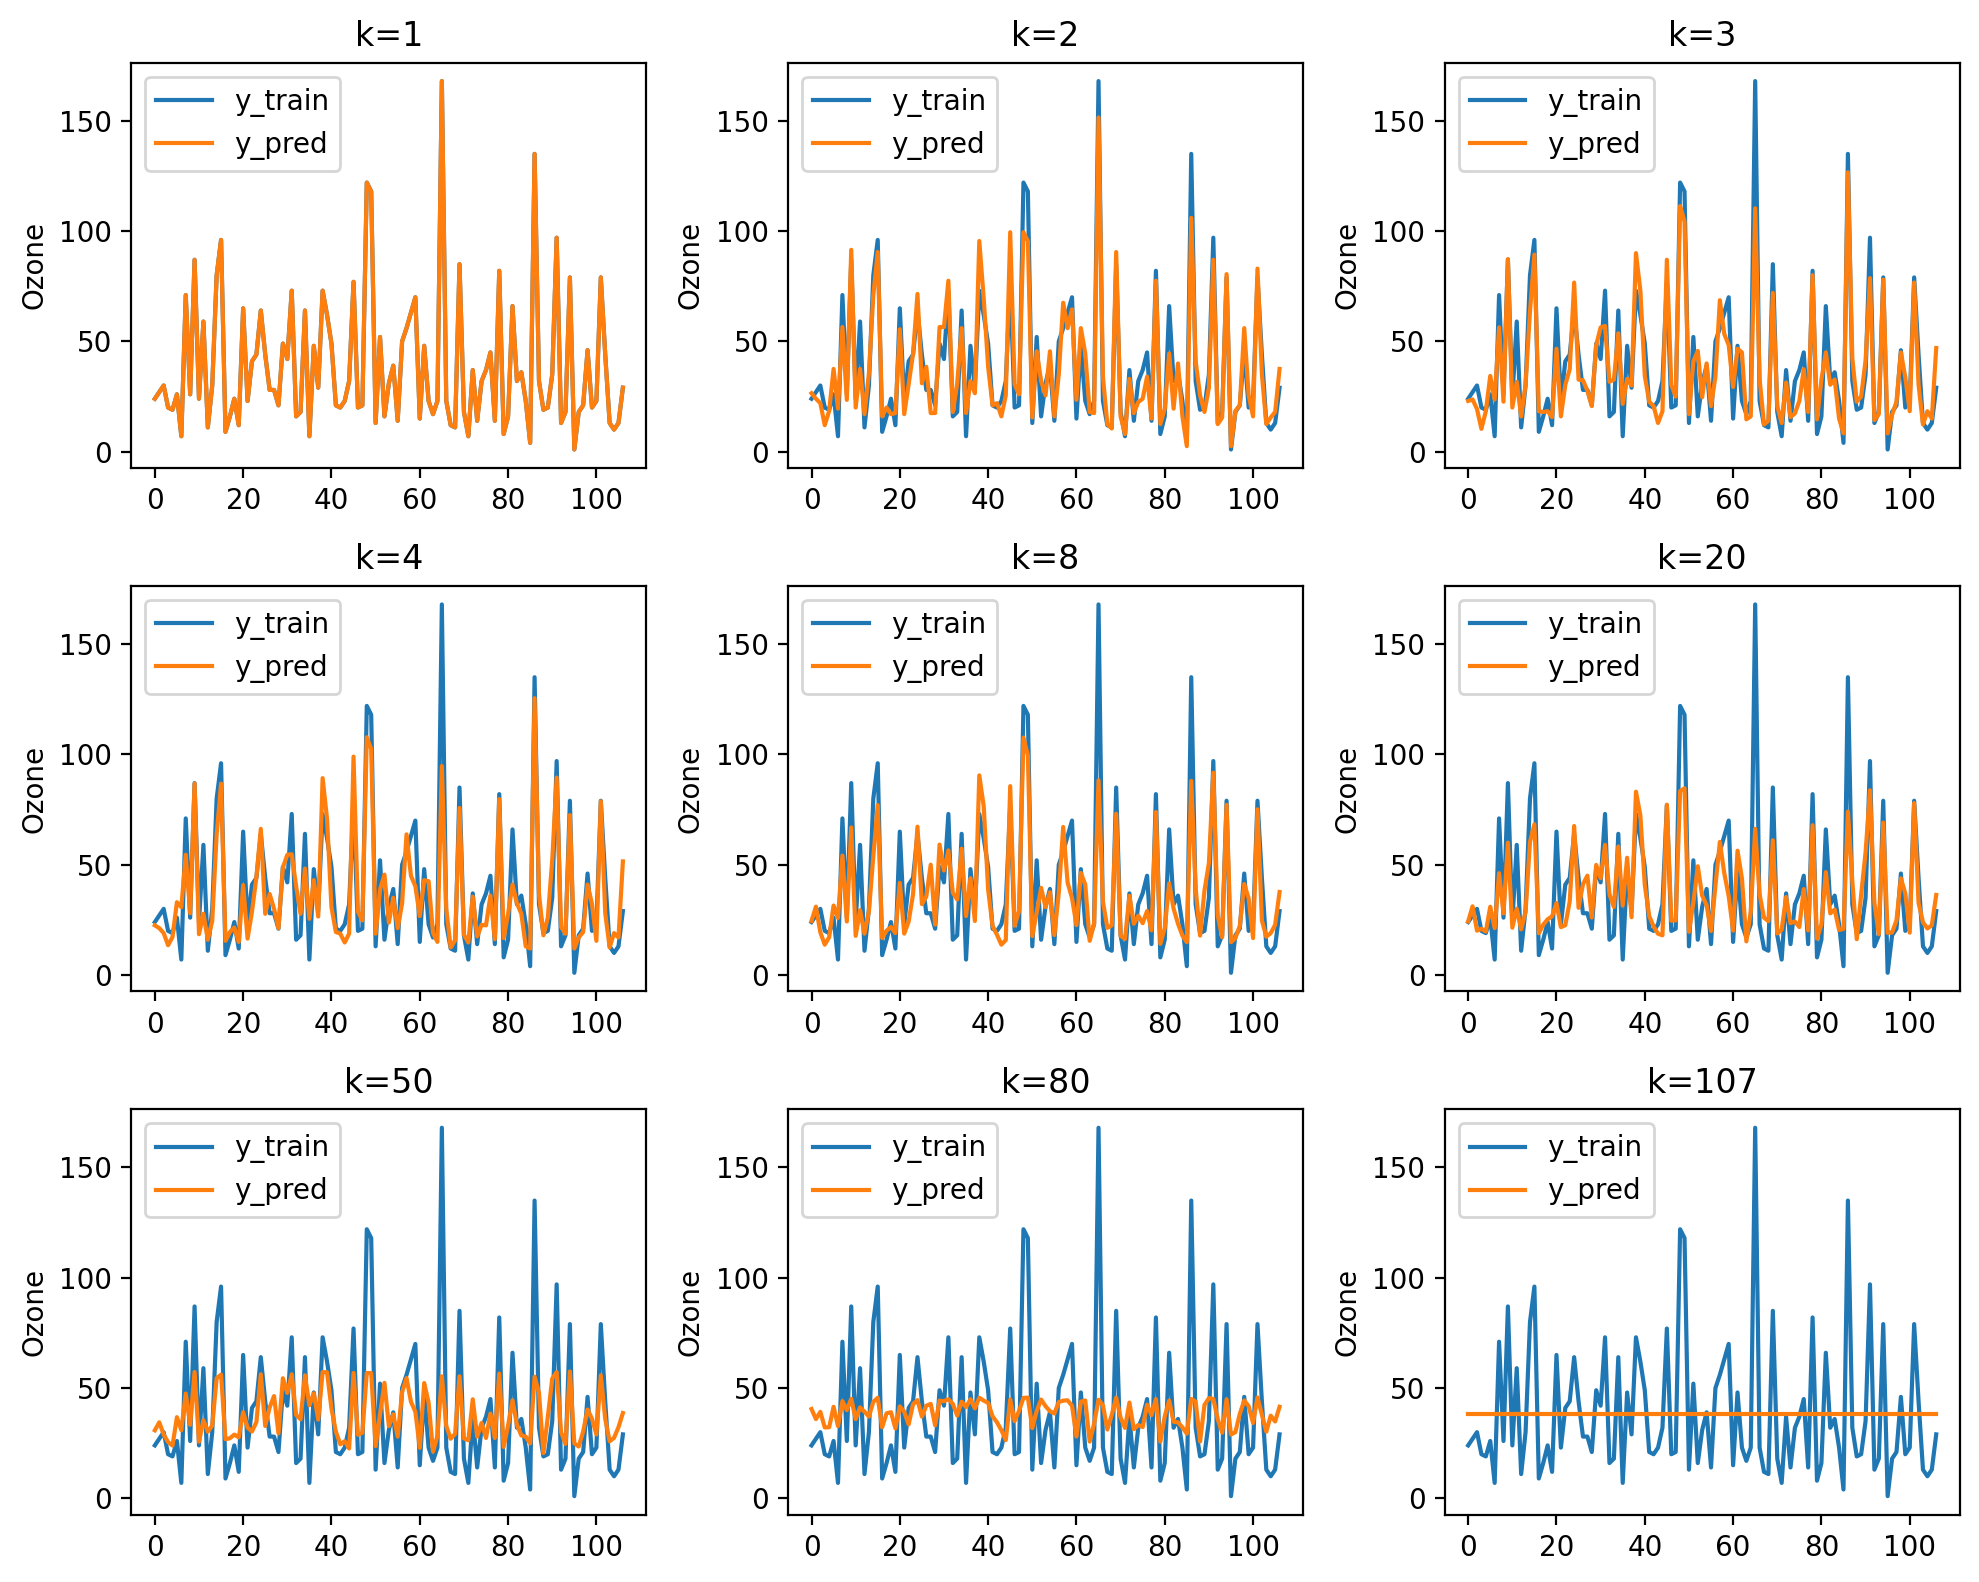

In [18]:
# 모델 복잡도
plt.figure(figsize=(10, 8))
for i, n in enumerate([1, 2, 3, 4, 8, 20, 50, 80, len(x_train)]):
    model = KNeighborsRegressor(n_neighbors=n)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_train)
    plt.subplot(3, 3, i+1)
    plt.plot(y_train.values, label='y_train')    # 학습할 정답
    plt.plot(y_pred, label='y_pred')             # 예측한 정답
    plt.title(f'k={n}')
    plt.legend()
    plt.ylabel('Ozone')
plt.tight_layout()
plt.show()

**2) 평가 성능**

- n_neighbors 값에 따라 평가 성능이 어느 정도 인지 확인합니다.

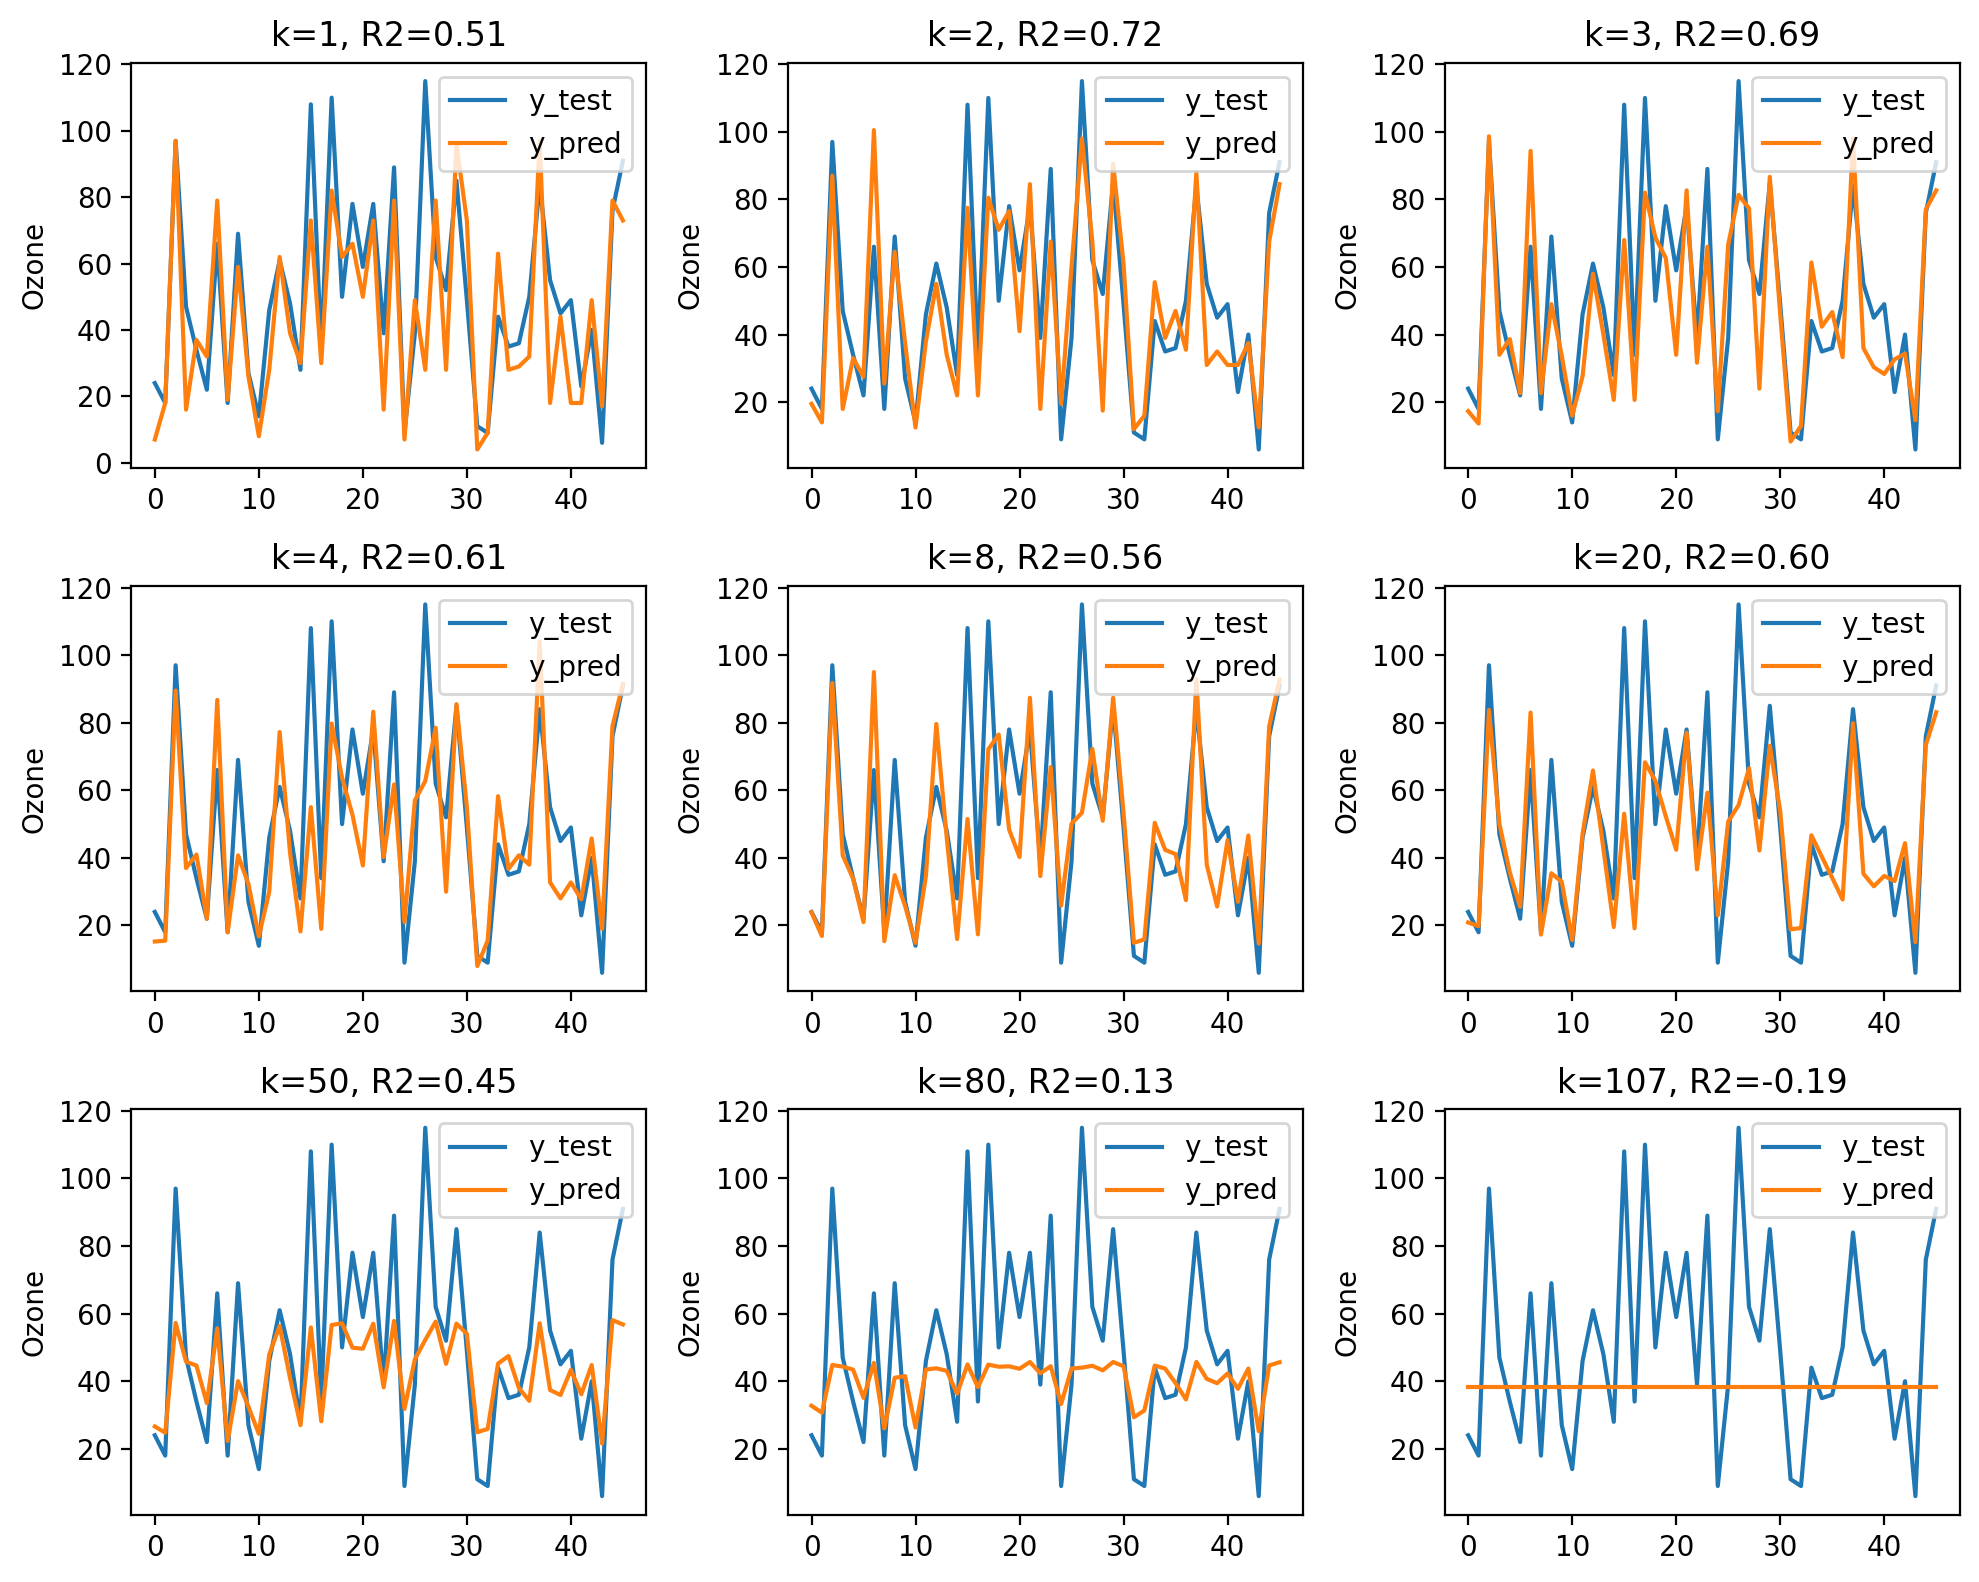

In [19]:
# 모델 복잡도
plt.figure(figsize=(10, 8))
for i, n in enumerate([1, 2, 3, 4, 8, 20, 50, 80, len(x_train)]):
    model = KNeighborsRegressor(n_neighbors=n)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    plt.subplot(3, 3, i+1)
    plt.plot(y_test.values, label='y_test') 
    plt.plot(y_pred, label='y_pred')      
    plt.title(f'k={n}, R2={r2:.2f}')
    plt.legend()
    plt.ylabel('Ozone')
plt.tight_layout()
plt.show()